In [3]:
# import packages here
import pandas as pd
import numpy as np
import sqlite3 as sq
from scipy import stats
from scipy.stats import chi2_contingency
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import warnings
warnings.filterwarnings("ignore")

In [4]:
crime=pd.read_csv('Mar5Crime.csv')

In [5]:
crime.head()

,Unnamed: 0,incident_number,offense_code_group,offense_description,occurred_on_date,month,day_of_week,hour,street,lat,long,location,Missing_Data
0,0,I182070945,Larceny,LARCENY ALL OTHERS,2018/9/2 13:00,9,Sunday,13,LINCOLN ST,42.357791,-71.139371,"(42.35779134, -71.13937053)",0
1,1,I182070941,Towed,TOWED MOTOR VEHICLE,2018/9/3 19:27,9,Monday,19,CAZENOVE ST,42.346589,-71.072429,"(42.34658879, -71.07242943)",0
2,2,I182070940,Investigate Property,INVESTIGATE PROPERTY,2018/9/3 21:16,9,Monday,21,NEWCOMB ST,42.334182,-71.078664,"(42.33418175, -71.07866441)",0
3,3,I182070938,Investigate Property,INVESTIGATE PROPERTY,2018/9/3 21:05,9,Monday,21,DELHI ST,42.275365,-71.090361,"(42.27536542, -71.09036101)",0
4,4,I182070936,Motor Vehicle Accident Response,M/V ACCIDENT INVOLVING PEDESTRIAN - INJURY,2018/9/3 21:09,9,Monday,21,TALBOT AVE,42.290196,-71.071590,"(42.29019621, -71.07159012)",0


In [6]:
crime= crime.drop(columns=['Unnamed: 0'])

In [7]:
crime.head()

,incident_number,offense_code_group,offense_description,occurred_on_date,month,day_of_week,hour,street,lat,long,location,Missing_Data
0,I182070945,Larceny,LARCENY ALL OTHERS,2018/9/2 13:00,9,Sunday,13,LINCOLN ST,42.357791,-71.139371,"(42.35779134, -71.13937053)",0
1,I182070941,Towed,TOWED MOTOR VEHICLE,2018/9/3 19:27,9,Monday,19,CAZENOVE ST,42.346589,-71.072429,"(42.34658879, -71.07242943)",0
2,I182070940,Investigate Property,INVESTIGATE PROPERTY,2018/9/3 21:16,9,Monday,21,NEWCOMB ST,42.334182,-71.078664,"(42.33418175, -71.07866441)",0
3,I182070938,Investigate Property,INVESTIGATE PROPERTY,2018/9/3 21:05,9,Monday,21,DELHI ST,42.275365,-71.090361,"(42.27536542, -71.09036101)",0
4,I182070936,Motor Vehicle Accident Response,M/V ACCIDENT INVOLVING PEDESTRIAN - INJURY,2018/9/3 21:09,9,Monday,21,TALBOT AVE,42.290196,-71.071590,"(42.29019621, -71.07159012)",0


In [8]:
crime.describe()

,month,hour,lat,long,Missing_Data
count,50966.000000,50966.000000,47687.000000,47687.000000,50966.000000
mean,5.591316,13.112369,42.147401,-70.800879,0.068104
std,1.714765,6.267445,2.743564,4.438147,0.251927
min,3.000000,0.000000,-1.000000,-71.178674,0.000000
25%,4.000000,9.000000,42.296662,-71.097134,0.000000
50%,6.000000,14.000000,42.324931,-71.077720,0.000000
75%,7.000000,18.000000,42.348164,-71.062563,0.000000
max,9.000000,23.000000,42.395042,-1.000000,1.000000


Creating dataframe for crimes WITHOUT location data

In [9]:
df1= crime[crime['Missing_Data']==1]
df2= crime[crime['Missing_Data']==0]

In [27]:
def compare(missing,normal,column_name):
    column_name = str(column_name)
    n=0

    for i in [missing,normal]:
        n+=1
        ser = i[column_name].value_counts()
        list_ser = list(ser)
        compare_index = list(ser.index)
        d={'index':compare_index, 'count':list_ser}
        df = pd.DataFrame(data=d)

        frequency = df.sort_values('index')
        frequency = frequency.reset_index()
        frequency = frequency.drop(columns=['level_0'])

        if n==1:
            frequency_missing = frequency
        else:
            frequency_normal = frequency

    merged_frequency= frequency_missing.merge(frequency_normal,how='inner',on='index')
    # Contingency Table
    #print(merged_frequency)
    mf=merged_frequency.to_numpy()
    mf = np.transpose(mf)
    mf = mf[1:3]
    chi2, p, dof, ex = chi2_contingency(mf)
    #print("chi2",chi2)
    print("p-value",p)
    #print("expected table",ex)
    #Normalized table
    index = merged_frequency['index']
    x = merged_frequency['count_x']
    y = merged_frequency['count_y']
    
    sum_x = sum(x)
    for j in range(len(x)):
        v = float(x[j]/sum_x)
        x.loc[j]=v
    
    sum_y = sum(y)
    for j in range(len(y)):
        v = float(y[j]/sum_y)
        y.loc[j]=v
    #Comparative bar chart
    X_axis = np.arange(len(index))
    plt.bar(X_axis - 0.2, x, 0.4, label = 'missing')
    plt.bar(X_axis + 0.2, y, 0.4, label = 'normal')
    
    return(merged_frequency)

p-value 7.063859766567496e-12


,index,count_x,count_y,residuals
0,0,0.049553,0.046426,0.003128
1,1,0.038606,0.026929,0.011676
2,2,0.035148,0.023076,0.012072
3,3,0.011812,0.013707,-0.001895
4,4,0.013253,0.011180,0.002073
5,5,0.013541,0.010612,0.002929
6,6,0.016710,0.016296,0.000413
7,7,0.023336,0.028298,-0.004962
8,8,0.040910,0.041310,-0.000399
9,9,0.031403,0.046594,-0.015191


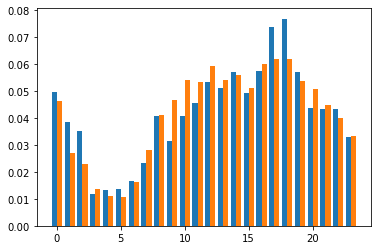

In [47]:
output_hour = compare(df1,df2,'hour')
output_hour['residuals']=output_hour['count_x']-output_hour['count_y']
output_hour

(array([ 0.0268762 ,  0.00017799,  0.00334255, -0.02055204, -0.02163744,
        -0.00861672, -0.00387077,  0.02672715, -0.00387026,  0.00142333]),
 array([ 0. ,  2.3,  4.6,  6.9,  9.2, 11.5, 13.8, 16.1, 18.4, 20.7, 23. ]),
 <BarContainer object of 10 artists>)

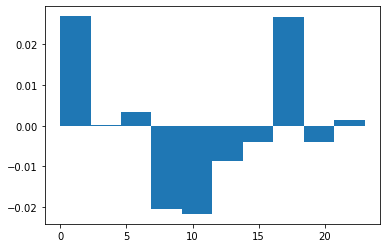

In [50]:
plt.hist(x=output_hour['index'],weights=output_hour['residuals'])



p-value 1.4291059532618616e-07


,index,count_x,count_y
0,3,0.154710,0.152248
1,4,0.135408,0.156774
2,5,0.186690,0.173871
3,6,0.177759,0.173008
4,7,0.174301,0.167028
5,8,0.167963,0.163259
6,9,0.003169,0.013812


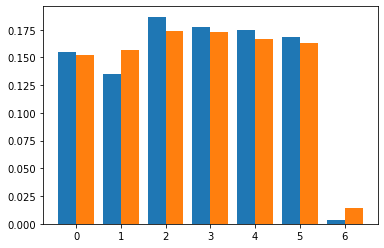

In [39]:
output_month = compare(df1,df2,'month')
output_month

p-value 0.2177188104595788


,index,count_x,count_y
0,Friday,0.152118,0.154164
1,Monday,0.134255,0.142289
2,Saturday,0.135984,0.142331
3,Sunday,0.124460,0.126476
4,Thursday,0.156727,0.149300
5,Tuesday,0.155287,0.141468
6,Wednesday,0.141170,0.143973


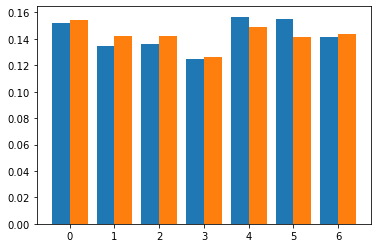

In [40]:
output_day = compare(df1,df2,'day_of_week')
output_day

p-value 0.0


,index,count_x,count_y
0,Aggravated Assault,0.026793,0.025356
1,Aircraft,0.000288,0.000084
2,Arson,0.000288,0.000274
3,Assembly or Gathering Violations,0.002017,0.002002
4,Auto Theft,0.013253,0.014986
5,Auto Theft Recovery,0.004322,0.003330
6,Ballistics,0.001441,0.002951
7,Commercial Burglary,0.000288,0.003646
8,Confidence Games,0.002305,0.008452
9,Counterfeiting,0.000576,0.003478


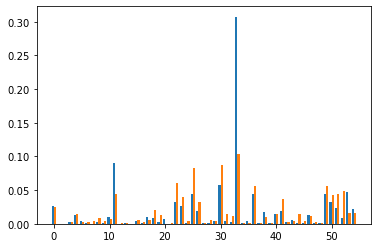

In [41]:
output_offense = compare(df1,df2,'offense_code_group')
output_offense

p-value 0.0


,index,count_x,count_y
0,A ST,0.000774,0.001007
1,ABBOTSFORD ST,0.000387,0.000645
2,ADAMS ST,0.006192,0.013255
3,ALBANY ST,0.018963,0.007615
4,ALBERT ST,0.000387,0.000242
...,...,...,...
372,WESTMINSTER ST,0.001161,0.000725
373,WESTVIEW ST,0.000387,0.001370
374,WILLIAM F MCCLELLAN HWY,0.001548,0.001773
375,WINTER PL,0.002709,0.000564


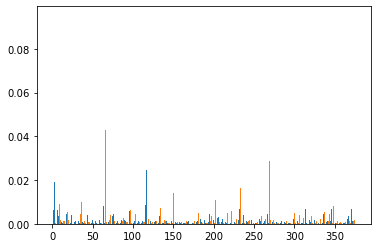

In [37]:
output_street = compare(df1,df2,'street')
output_street

making dataframe into a numpy array in order to apply to contingency test

Assumptions: Test of Independence
1. Simple Random Sample of n subjects
2. Two variables/factors 𝑅, 𝐶 of interest with each having 𝑟, 𝑐 mutually exclusive and exhaustive categories/outcomes/levels, respectively.
3. Each subject can be classified according to one level of each factor of interest.
4. Expected number of outcomes, assuming independence, for each pairing of levels, across factors, is at least 1. That is, 𝐸  G,[ ≥ 1 for all pairs (𝑖, 𝑗). Further, no more than 20% should be less than 5.

The null hypothesis is that whether the crime location is recorded is independent from the hour of the day. 

Since the p-value (7.02e-12) in the chi2 test is significantly lower than 0.05, we reject the null hypothesis. 

Whether the crime location is recorded is not independent of the hour of the day. 